# Challenge Answers

## Create Point objects

In [38]:
# Default location at (0, 0)
pt1 = arcpy.Point()

# A Point object is just a container for coordinate values
display(pt1)

<Point (0.0, 0.0, #, #)>

In [39]:
# Change coordinates of Point object
pt2 = arcpy.Point()
pt2.X = 3
pt2.Y = 5

display(pt2)

<Point (3.0, 5.0, #, #)>

In [40]:
# Create Point object with specified location
pt3 = arcpy.Point(1, 6)

display(pt3)

<Point (1.0, 6.0, #, #)>

## Create PointGeometry Object

In [48]:
ptGeom = arcpy.PointGeometry(pt1)

## Create an array of Point objects

In [44]:
ptArray = arcpy.Array([pt1, pt2, pt3])

display(ptArray)

<Array [<Point (0.0, 0.0, #, #)>, <Point (3.0, 5.0, #, #)>, <Point (1.0, 6.0, #, #)>]>

## Create a Geometry object from an array of Point objects

In [57]:
# Multipoint
mPoint = arcpy.Multipoint(ptArray)

In [58]:
# Polygon
pGon = arcpy.Polygon(ptArray)

## Create a Geometry object with a specified coordinate reference system

In [66]:
# Polyline with WGS84 UTM Zone 15 N spatial reference

crs = arcpy.SpatialReference(32615)
pLine = arcpy.Polyline(ptArray, crs)

## Display an svg representation of a geometry object

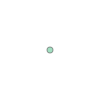

In [67]:
display(ptGeom)

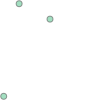

In [68]:
display(mPoint)

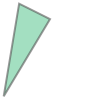

In [70]:
display(pGon)

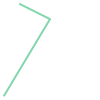

In [71]:
display(pLine)

## Access a spatial property of a Geometry object

In [75]:
pLine.spatialReference

name (Projected Coordinate System),WGS_1984_UTM_Zone_15N
factoryCode (WKID),32615
linearUnitName (Linear Unit),Meter
name (Geographic Coordinate System),GCS_WGS_1984
factoryCode (WKID),4326
angularUnitName (Angular Unit),Degree
datumName (Datum),D_WGS_1984


In [74]:
pLine.length

8.06701987234509

## Access a spatial method of a Geometry object

In [88]:
# find a point exactly 50% of the way along the distance of a line
midPoint = pLine.positionAlongLine(0.50, True)

## Pass a geometry object to a geoprocessing tool

In [ ]:
bufferOutput = "memory/buffer"

arcpy.analysis.Buffer(pLine, bufferOutput, "1 meter")

## Use a cursor to access the geometry of a feature

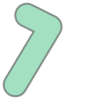

In [92]:
with arcpy.da.SearchCursor(bufferOutput, ["SHAPE@"]) as sCursor:
    for row in sCursor:
        display(row[0])